In [54]:
from sklearn.preprocessing import Imputer
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
dict = {'valor' : [120, np.nan, 240],
        'ganancia' : [20, 50, np.nan],
        'impuesto' : [240, 33, np.nan]}

df = pd.DataFrame(data=dict)
df

,valor,ganancia,impuesto
0,120.0,20.0,240.0
1,NaN,50.0,33.0
2,240.0,NaN,NaN


### El Imputer puede usarse en 2 partes: estimar (fit) y transformar (transform)
- **Al aplicar el método fit, solo se habrá hecho una estimación sin ninguna transformación**

- **Por defecto el método será aplicar la media para imputar los datos faltantes**

In [3]:
imputer = Imputer ()
imputer.fit(df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [4]:
dict = {'valor' : [10, np.nan, np.nan],
        'ganancia' : [np.nan, 50, np.nan],
        'impuesto' : [2, 12, 24]}
df2 = pd.DataFrame(data=dict)
df2

,valor,ganancia,impuesto
0,10.0,NaN,2
1,NaN,50.0,12
2,NaN,NaN,24


### El imputer ya ha estimado la forma como debe completar los datos faltantes, puede ser aplicado a otro objeto (en este caso un DataFrame) sin necesidad de que se realice la estimación nuevamente.

In [5]:
imputer.transform(df2)

array([[ 10.,  35.,   2.],
       [180.,  50.,  12.],
       [180.,  35.,  24.]])

### Los valores faltantes en las columnas son completados usando la media asignada al imputer en la etapa de estimación (fit), por lo tanto: 
- Columna valor: valores faltantes 2, promedio estimado (fit) = 180
- Columna ganancia: valores faltantes 2, promedio estimado (fit) = 35

## Regresión Lineal

In [6]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')

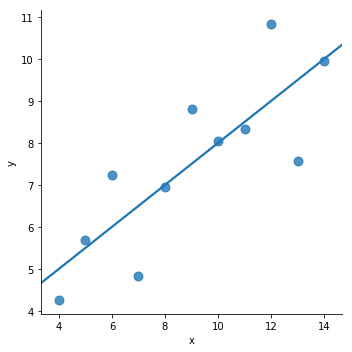

In [12]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset=='I'"), ci=None, scatter_kws={"s": 80})

### Ecuación Normal

In [14]:
# genera valores lineales aleatorios
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1) 

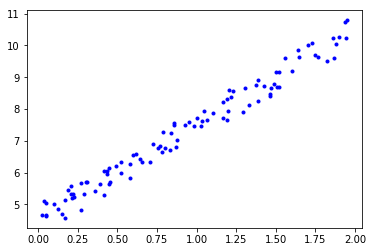

In [18]:
plt.plot(X, Y, 'b.')

### Paréntesis (
**Numpy.c_ : Translates slice objects to concatenation along the second axis:**

In [23]:
np.array([1,2,3])

array([1, 2, 3])

In [21]:
np.c_[np.array([1,2,3])]

array([[1],
       [2],
       [3]])

In [22]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [24]:
np.c_[np.array([1,2,3]), np.array([4,5,6]), np.array([7,8,9])]

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

### )

In [25]:
X_b = np.c_[np.ones((100,1)), X]

In [28]:
X_b[:5]


array([[1.        , 1.20623674],
       [1.        , 1.93832724],
       [1.        , 1.60565988],
       [1.        , 1.19265913],
       [1.        , 1.29273787]])

## Linear algebra (numpy.linalg)
- **numpy.linalg.inv(a)**: Compute the (multiplicative) inverse of a matrix.
- **dot** : product of two arrays.

In [35]:
# Ecuación Normal
mejores_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
mejores_params

array([[4.59202477],
       [2.94327103]])

In [32]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [34]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [36]:
y_predict_normal = X_new_b.dot(mejores_params)
y_predict_normal

array([[ 4.59202477],
       [10.47856683]])

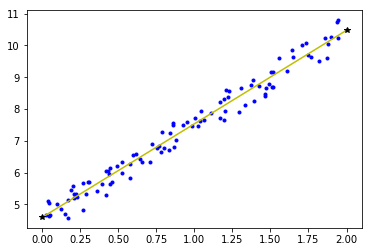

In [48]:
plt.plot(X, Y, "b.")
plt.plot(X_new, y_predict_normal, "y-")
plt.plot(X_new, y_predict_normal, "k*")

### Regresión Lineal

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_predict = lin_reg.predict(X_new)

### Gradiente Descendiente

In [52]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()

In [55]:
sgd_reg.fit(X, Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [57]:
sgd_reg_y_predict = sgd_reg.predict(X_new)

**Graficando las diferentes predicciones**

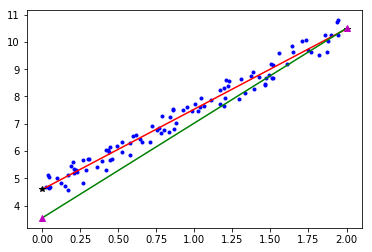

In [59]:
plt.plot(X, Y, 'b.')
plt.plot(X_new, y_predict, 'r-')
plt.plot(X_new, y_predict, 'k*')
plt.plot(X_new, sgd_reg_y_predict, 'g-')
plt.plot(X_new, sgd_reg_y_predict, 'm^')